<a href="https://colab.research.google.com/github/taylan-sen/CIS490b_computer_vision/blob/main/Machine_Learning_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Intro

* Two main classes of machine learning
  * **Supervised** - we have data labels we are trying to predict
  * **Unsupervised** - there are no data labels, we are trying to learn something about the data, like how its clustered

* Two main classes of machine learning models
  * **parameteric** - model is defined by parameters
    * examples:
      * logistic regression (classification)
      * linear regression (regression)
  * **nonparametric** - model is defined by data samples
    * k-nearest neighbor
    






(150, 2)
# datapoints we have is: 100
# dimensions for each data point is: 2


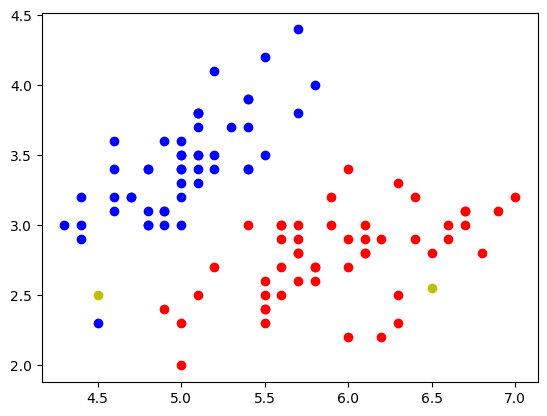

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, neighbors, datasets

data = datasets.load_iris()
X = data.data[:,0:2]
y = data.target

# take only first two classes, y=0, y=1
print(X.shape)
Xsub = X[y!=2,:]
ysub = y[y!=2]
print('# datapoints we have is:', Xsub.shape[0])
print('# dimensions for each data point is:', Xsub.shape[1])

test_point = np.array([[6.5,2.55], [4.5,2.5]], dtype=float)

# what does data look like?
plt.scatter(Xsub[ysub==0,0], Xsub[ysub==0,1], color='b')
plt.scatter(Xsub[ysub==1,0], Xsub[ysub==1,1], color='r')
plt.scatter(test_point[:,0], test_point[:,1], color='y')
plt.show()

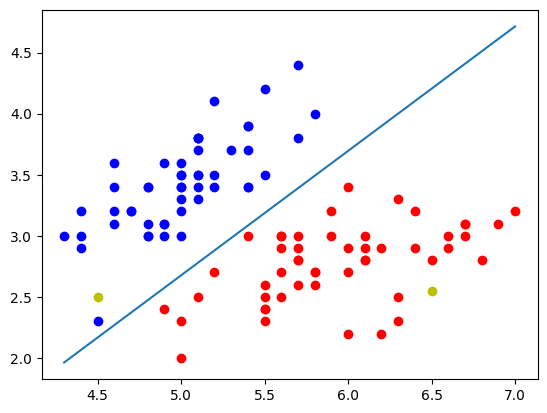

the NN predictions for [p1, p2] are: [1 0]
the LR predictions for [p1, p2] are: [1 0]


In [ ]:
# FIT models
model = neighbors.KNeighborsClassifier(1)
model2 = linear_model.LogisticRegression()
model.fit(Xsub,ysub)
model2.fit(Xsub,ysub)

# plot the fit line for LogisticRegression
x = np.linspace(min(Xsub[:,0]),max(Xsub[:,0]), 100)
y = -(model2.intercept_ + model2.coef_[0][0]*x)/model2.coef_[0][1]
plt.plot(x,y)
plt.scatter(Xsub[ysub==0,0], Xsub[ysub==0,1], color='b')
plt.scatter(Xsub[ysub==1,0], Xsub[ysub==1,1], color='r')
plt.scatter(test_point[:,0], test_point[:,1], color='y')
plt.show()

# predict our test points
print('the NN predictions for [p1, p2] are:', model.predict(test_point))
print('the LR predictions for [p1, p2] are:', model2.predict(test_point))
#print(model.predict(Xsub))
#Xsub

<ipython-input-26-368b91c27da5>:23: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


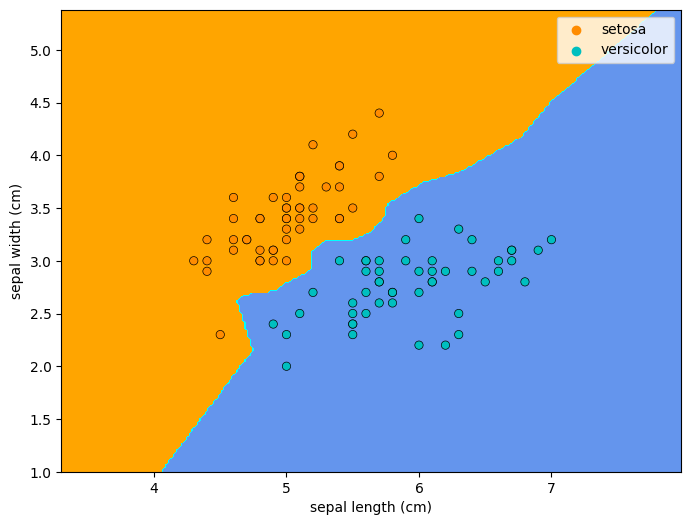

In [ ]:
import seaborn as sns
from matplotlib.colors import ListedColormap
# lets see the KNN decision boundary

h = 0.02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xsub[:, 0].min() - 1, Xsub[:, 0].max() + 1
y_min, y_max = Xsub[:, 1].min() - 1, Xsub[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(
    x=Xsub[:, 0],
    y=Xsub[:, 1],
    hue=data.target_names[ysub],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title(
#    "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
#)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

plt.show()